In [1]:
from face_client.face_client import FaceClient

In [2]:
API_KEY = 'egk0ko9neatt4ftsgmhsmklf2r'
API_SECRET = '67doedp6s4dcnm5kmuhkgetj8p'

In [3]:
client = FaceClient(API_KEY, API_SECRET)

In [ ]:
client.faces_recognize('all', 'http://farm1.static.flickr.com/41/104498903_bad315cee0.jpg', namespace = 'projectfaces')

In [4]:
photos = 'https://image.ibb.co/eakyEc/logan1.jpg,https://image.ibb.co/dG9Enx/logan2.jpg,https://image.ibb.co/jYT77x/logan3.jpg,https://image.ibb.co/etBS7x/logan8.jpg,https://image.ibb.co/btd77x/logan0.jpg,https://image.ibb.co/j2kLSx/logan6.jpg,https://image.ibb.co/daBunx/logan4.jpg,https://image.ibb.co/j79Quc/logan5.jpg,https://image.ibb.co/cmow0H/logan7.jpg,https://image.ibb.co/nJeVSx/logan10.jpg,https://image.ibb.co/dHmoEc/logan9.jpg,https://image.ibb.co/bYboEc/logan12.jpg,https://image.ibb.co/eEsjnx/logan11.jpg,https://image.ibb.co/gdy1Zc/logan13.jpg,https://image.ibb.co/nuRzLH/logan14.jpg'
test_photo = 'https://image.ibb.co/cN4rZc/logan15.jpg'

In [ ]:
response = client.faces_detect(photos)
tids = [photo['tags'][0]['tid'] for photo in response['photos']]

In [ ]:
tids

In [ ]:
client.tags_save(tids= ','.join(tids), uid = 'logan@projectfaces', label = 'Logan Rooks')

In [ ]:
client.faces_train('logan@projectfaces')

In [ ]:
results = client.faces_recognize('all', test_photo, namespace='projectfaces')

In [ ]:
results

In [5]:
results = client.faces_recognize('all', test_photo, namespace='projectfaces')

{'api_key': 'egk0ko9neatt4ftsgmhsmklf2r', 'api_secret': '67doedp6s4dcnm5kmuhkgetj8p', 'uids': 'all', 'attributes': 'gender,smiling,lips,eyes,age,mood', 'urls': 'https://image.ibb.co/cN4rZc/logan15.jpg', 'namespace': 'projectfaces'}


In [7]:
test_photos = 'https://image.ibb.co/ntZuLH/logan18.jpg,https://image.ibb.co/d0OAuc/logan17.jpg,https://image.ibb.co/hdziEc/logan16.jpg'

In [8]:
results = client.faces_recognize('all', test_photos, namespace='projectfaces')

{'api_key': 'egk0ko9neatt4ftsgmhsmklf2r', 'api_secret': '67doedp6s4dcnm5kmuhkgetj8p', 'uids': 'all', 'attributes': 'all', 'urls': 'https://image.ibb.co/ntZuLH/logan18.jpg,https://image.ibb.co/d0OAuc/logan17.jpg,https://image.ibb.co/hdziEc/logan16.jpg', 'namespace': 'projectfaces'}


In [37]:
def extract_identity(uids, threshold):
    max_confidence = 0
    identity = None
    for id_ in uids:
        confidence = id_['confidence']
        if confidence > threshold and confidence > max_confidence:
            identity = id_['uid']
            max_confidence = confidence
    return identity

In [55]:
metrics = ['gender', 'mood', 'smiling', 'eyes']
faces = response['photos'][0]['tags']
face_descriptions = []
for face in faces:
    attributes = face['attributes']
    threshold = face['threshold']
    if attributes['face']['confidence'] > threshold and attributes['face']['value'] == 'true': 
        description = {
            'center': face['center'],
            'identity': extract_identity(face['uids'], threshold),
            **{metric: attributes[metric]['value'] if \
               attributes[metric]['confidence'] > threshold \
               else None for metric in metrics}
            }
        face_descriptions.append(description)

In [56]:
face_descriptions

[{'center': {'x': 64.02, 'y': 60.8},
  'eyes': 'open',
  'gender': 'male',
  'identity': None,
  'mood': 'angry',
  'smiling': 'true'},
 {'center': {'x': 26.19, 'y': 45.33},
  'eyes': 'open',
  'gender': None,
  'identity': None,
  'mood': 'surprised',
  'smiling': None}]

In [33]:
multiple_faces = 'https://res.cloudinary.com/demo/image/upload/c_crop,g_faces,z_0.75/young_couple.jpg'

In [34]:
response = client.faces_recognize('all', multiple_faces, namespace='projectfaces')

{'api_key': 'egk0ko9neatt4ftsgmhsmklf2r', 'api_secret': '67doedp6s4dcnm5kmuhkgetj8p', 'uids': 'all', 'attributes': 'all', 'urls': 'https://res.cloudinary.com/demo/image/upload/c_crop,g_faces,z_0.75/young_couple.jpg', 'namespace': 'projectfaces'}


In [89]:
rpi_addr = 'http://192.168.0.14/temp.jpg'

In [90]:
response = client.faces_recognize('all', rpi_addr, namespace='projectfaces')

{'api_key': 'egk0ko9neatt4ftsgmhsmklf2r', 'api_secret': '67doedp6s4dcnm5kmuhkgetj8p', 'uids': 'all', 'attributes': 'all', 'urls': 'http://192.168.0.14/temp.jpg', 'namespace': 'projectfaces'}


FaceError: DOWNLOAD_ERROR (30)

In [86]:
import urllib, io
from PIL import Image
rpi_addr = 'http://192.168.0.14/temp.jpg'
data = io.BytesIO(urllib.request.urlopen(rpi_addr).read())

In [87]:
img = Image.open(data)

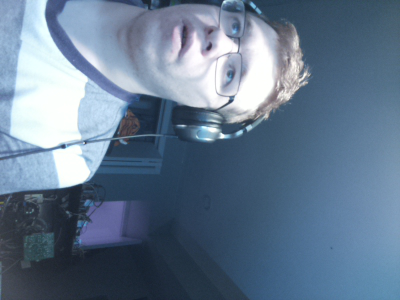

In [88]:
img